# Math 725

### Brent A. Thorne <brentathorne@gmail.com>

In class exercise detail.

## Ex 1.2 Midpoint Polygon Map

Suppose $V=(p_1,...,p_n)$, where $n$ is fixed.

$T:V\rightarrow V$

$(p_1,...,p_n) \xrightarrow{T} (\frac{p_1+p_2}{2},...,\frac{p_n+p_1}{2})$


In [1]:
# import libraries
import numpy as np
import sympy as sym
from sympy.matrices import Matrix
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from sympy import init_printing
init_printing() 

In [2]:
# fancy plot
def z_plot(Z, c=None):
    #display(Latex(f'${sym.latex(Z.T)}$'))
    z= np.array(Z.tolist()).astype(np.complex64)
    n = len(z)
    plt.scatter(z.real, z.imag, c=c)
    for i in range(len(z)): # this got a bit fancy
        zz = z[i] + .06 *np.exp(1j*2*np.pi*i/n)  #offset text
        plt.text(zz.real, zz.imag, i, fontsize=12)
    z = np.append(z,z[0]) # close the shape
    plt.plot(z.real, z.imag, c=c)
    plt.grid(visible=True);
    plt.gca().set_aspect("equal") # square grids are pretty
    plt.axhline(0, color='black', alpha = .2, linestyle='--')
    plt.axvline(0, color='black', alpha = .2, linestyle='--')

In [3]:
# midpoint transform
def T(n):
    m = [sym.Rational(1,2)]  + [0 for i in range(n-2)] + [sym.Rational(1,2)] 
    return Matrix([m[-i:] + m[:-i] for i in range(n)]) 

def S(n):
    return sym.eye(n) * ( 1+sym.exp(-2 * sym.I * sym.pi/n) ) / 2

### Midpoint Transform Matrix 

⎡⎛      ⎡⎡-1⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞  ⎛          ⎡⎡ⅈ ⎤⎤⎞  ⎛          ⎡⎡-ⅈ⎤⎤⎞⎤
⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜          ⎢⎢  ⎥⎥⎟  ⎜          ⎢⎢  ⎥⎥⎟⎥
⎢⎜      ⎢⎢1 ⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟  ⎜1   ⅈ     ⎢⎢-1⎥⎥⎟  ⎜1   ⅈ     ⎢⎢-1⎥⎥⎟⎥
⎢⎜0, 1, ⎢⎢  ⎥⎥⎟, ⎜1, 1, ⎢⎢ ⎥⎥⎟, ⎜─ - ─, 1, ⎢⎢  ⎥⎥⎟, ⎜─ + ─, 1, ⎢⎢  ⎥⎥⎟⎥
⎢⎜      ⎢⎢-1⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟  ⎜2   2     ⎢⎢-ⅈ⎥⎥⎟  ⎜2   2     ⎢⎢ⅈ ⎥⎥⎟⎥
⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜          ⎢⎢  ⎥⎥⎟  ⎜          ⎢⎢  ⎥⎥⎟⎥
⎣⎝      ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠  ⎝          ⎣⎣1 ⎦⎦⎠  ⎝          ⎣⎣1 ⎦⎦⎠⎦

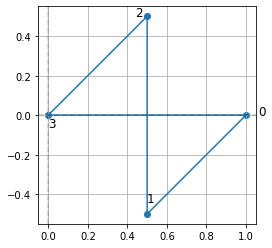

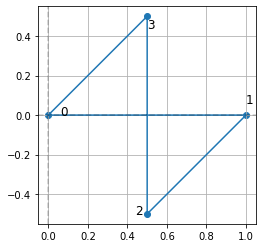

In [4]:
n=4

E = T(n).eigenvects()
display(E)
z_plot(Matrix(list(T(n).eigenvals().keys())))
plt.show()


# validate behaviour of sort complex
# np.sort_complex(np.array(list(T(n).eigenvals().keys())).astype(np.complex64)) 
z_plot(Matrix([e[0] for e in E]))

In [5]:
(T(n).T*T(n)).eigenvects()

⎡⎛      ⎡⎡-1⎤⎤⎞  ⎛        ⎡⎡-1⎤  ⎡0 ⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞⎤
⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜        ⎢⎢  ⎥  ⎢  ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟⎥
⎢⎜      ⎢⎢1 ⎥⎥⎟  ⎜        ⎢⎢0 ⎥  ⎢-1⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟⎥
⎢⎜0, 1, ⎢⎢  ⎥⎥⎟, ⎜1/2, 2, ⎢⎢  ⎥, ⎢  ⎥⎥⎟, ⎜1, 1, ⎢⎢ ⎥⎥⎟⎥
⎢⎜      ⎢⎢-1⎥⎥⎟  ⎜        ⎢⎢1 ⎥  ⎢0 ⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟⎥
⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜        ⎢⎢  ⎥  ⎢  ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣1 ⎦⎦⎠  ⎝        ⎣⎣0 ⎦  ⎣1 ⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

In [6]:
P, D = T(n).diagonalize()
P, D #, sym.simplify(P*D*P.inv())

⎛                 ⎡0  0    0      0  ⎤⎞
⎜                 ⎢                  ⎥⎟
⎜⎡-1  1  ⅈ   -ⅈ⎤  ⎢0  1    0      0  ⎥⎟
⎜⎢             ⎥  ⎢                  ⎥⎟
⎜⎢1   1  -1  -1⎥  ⎢      1   ⅈ       ⎥⎟
⎜⎢             ⎥, ⎢0  0  ─ - ─    0  ⎥⎟
⎜⎢-1  1  -ⅈ  ⅈ ⎥  ⎢      2   2       ⎥⎟
⎜⎢             ⎥  ⎢                  ⎥⎟
⎜⎣1   1  1   1 ⎦  ⎢             1   ⅈ⎥⎟
⎜                 ⎢0  0    0    ─ + ─⎥⎟
⎝                 ⎣             2   2⎦⎠

In [7]:
sym.simplify(P*D*P.inv())

⎡1/2   0    0   1/2⎤
⎢                  ⎥
⎢1/2  1/2   0    0 ⎥
⎢                  ⎥
⎢ 0   1/2  1/2   0 ⎥
⎢                  ⎥
⎣ 0    0   1/2  1/2⎦

In [8]:
from sympy.abc import x, y
T(n), T(n).charpoly()

⎛⎡1/2   0    0   1/2⎤                                                         
⎜⎢                  ⎥                                                         
⎜⎢1/2  1/2   0    0 ⎥                                                         
⎜⎢                  ⎥, PurePoly(lambda**4 - 2*lambda**3 + 3/2*lambda**2 - 1/2*
⎜⎢ 0   1/2  1/2   0 ⎥                                                         
⎜⎢                  ⎥                                                         
⎝⎣ 0    0   1/2  1/2⎦                                                         

                            ⎞
                            ⎟
                            ⎟
lambda, lambda, domain='QQ')⎟
                            ⎟
                            ⎟
                            ⎠

In [9]:
Q, R = T(n).QRdecomposition()
Q,R, Q*R

⎛⎡√2  -√6    √3 ⎤                                          ⎞
⎜⎢──  ────   ── ⎥                                          ⎟
⎜⎢2    6     6  ⎥  ⎡√2  √2       √2 ⎤                      ⎟
⎜⎢              ⎥  ⎢──  ──  0    ── ⎥                      ⎟
⎜⎢√2   √6   -√3 ⎥  ⎢2   4        4  ⎥  ⎡1/2   0    0   1/2⎤⎟
⎜⎢──   ──   ────⎥  ⎢                ⎥  ⎢                  ⎥⎟
⎜⎢2    6     6  ⎥  ⎢    √6  √6  -√6 ⎥  ⎢1/2  1/2   0    0 ⎥⎟
⎜⎢              ⎥, ⎢0   ──  ──  ────⎥, ⎢                  ⎥⎟
⎜⎢     √6    √3 ⎥  ⎢    4   6    12 ⎥  ⎢ 0   1/2  1/2   0 ⎥⎟
⎜⎢0    ──    ── ⎥  ⎢                ⎥  ⎢                  ⎥⎟
⎜⎢     3     6  ⎥  ⎢        √3   √3 ⎥  ⎣ 0    0   1/2  1/2⎦⎟
⎜⎢              ⎥  ⎢0   0   ──   ── ⎥                      ⎟
⎜⎢           √3 ⎥  ⎣        3    3  ⎦                      ⎟
⎜⎢0    0     ── ⎥                                          ⎟
⎝⎣           2  ⎦                                          ⎠

### Show a basis

In [10]:
# Show a basis vector
z = sym.exp(-2 * sym.I * sym.pi/n)
V = Matrix([z**i for i in range(n)])
V

⎡1 ⎤
⎢  ⎥
⎢-ⅈ⎥
⎢  ⎥
⎢-1⎥
⎢  ⎥
⎣ⅈ ⎦

In [11]:
# Consider a Permutation Matrix
M = sym.diag([z**i for i in range(n)], unpack=True)
M**0, M**1, M**2 # ...

⎛⎡1  0  0  0⎤  ⎡1  0   0   0⎤  ⎡1  0   0  0 ⎤⎞
⎜⎢          ⎥  ⎢            ⎥  ⎢            ⎥⎟
⎜⎢0  1  0  0⎥  ⎢0  -ⅈ  0   0⎥  ⎢0  -1  0  0 ⎥⎟
⎜⎢          ⎥, ⎢            ⎥, ⎢            ⎥⎟
⎜⎢0  0  1  0⎥  ⎢0  0   -1  0⎥  ⎢0  0   1  0 ⎥⎟
⎜⎢          ⎥  ⎢            ⎥  ⎢            ⎥⎟
⎝⎣0  0  0  1⎦  ⎣0  0   0   ⅈ⎦  ⎣0  0   0  -1⎦⎠

In [12]:
# Build a Matrix for our basis using permutations M^k
B = Matrix([[(M**k)*V for k in range(n)]])
B, B.rref() #notice this is a polynomial

⎛⎡1   1   1   1⎤  ⎛⎡1  0  0  0⎤              ⎞⎞
⎜⎢             ⎥  ⎜⎢          ⎥              ⎟⎟
⎜⎢-ⅈ  -1  ⅈ   1⎥  ⎜⎢0  1  0  0⎥              ⎟⎟
⎜⎢             ⎥, ⎜⎢          ⎥, (0, 1, 2, 3)⎟⎟
⎜⎢-1  1   -1  1⎥  ⎜⎢0  0  1  0⎥              ⎟⎟
⎜⎢             ⎥  ⎜⎢          ⎥              ⎟⎟
⎝⎣ⅈ   -1  -ⅈ  1⎦  ⎝⎣0  0  0  1⎦              ⎠⎠

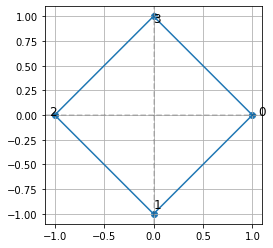

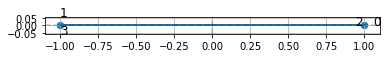

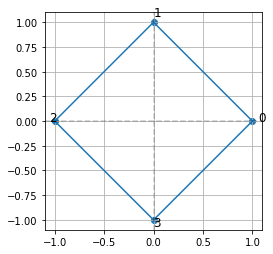

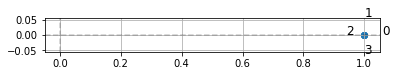

In [13]:
# Recall our basis vectors
for i in range(n):
    z_plot((M**i)*V)
    plt.show()

'No inverse transform for an even polygon.'

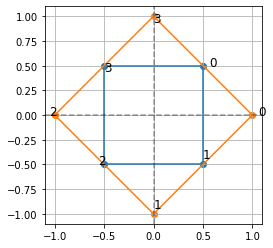

In [14]:
# now let's consider just one basis vector permutation and a change of basis
#z_plot(M*V) # another basis vector permutation
W = T(n) * V  # breath in 
z_plot(W)
z_plot(V)

if n%2 != 0: # avoid n even
    U = T(n).inv() * V  # breath out
    z_plot(U)
else:
    display('No inverse transform for an even polygon.')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

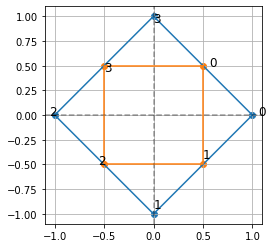

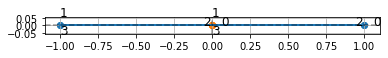

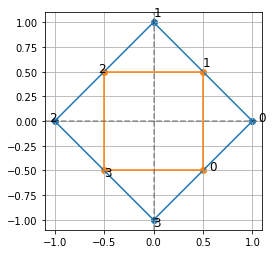

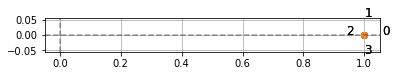

In [24]:
display(Latex(f'T(n).eigenvec()$={sym.latex(T(n).eigenvects())}$'))
display(Latex(f'$T(n)B={sym.latex(T(n))}{sym.latex(B)}={sym.latex(T(n)*B)}$'))

for i in range(B.shape[1]):
    z_plot(B.col(i))
    z_plot((T(n)*B).col(i))
    plt.show()
    display()

### Show a random Polygon

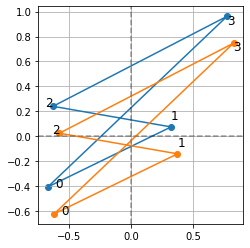

In [16]:
import random
P = Matrix([2*random.random()-1 + sym.I*(2*random.random()-1) for i in range(n)])
z_plot(P)

# average P
center = ( sym.ones(P.shape[0], 1).T * P/P.shape[0] )[0] * sym.ones(P.shape[0], 1)
Q = P-center
z_plot(Q)

### Consider the Projection of a Tranform

In [17]:
L= sym.eye(n)-T(n) # Laplacian?  Discuss with Math Folks.
display(L)

⎡1/2    0     0    -1/2⎤
⎢                      ⎥
⎢-1/2  1/2    0     0  ⎥
⎢                      ⎥
⎢ 0    -1/2  1/2    0  ⎥
⎢                      ⎥
⎣ 0     0    -1/2  1/2 ⎦

In [18]:
M**1*L # permute the projection

⎡1/2   0    0    -1/2⎤
⎢                    ⎥
⎢ ⅈ   -ⅈ             ⎥
⎢ ─   ───   0     0  ⎥
⎢ 2    2             ⎥
⎢                    ⎥
⎢ 0   1/2  -1/2   0  ⎥
⎢                    ⎥
⎢          -ⅈ     ⅈ  ⎥
⎢ 0    0   ───    ─  ⎥
⎣           2     2  ⎦

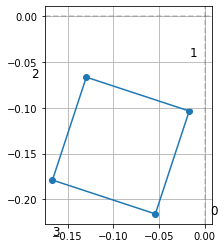

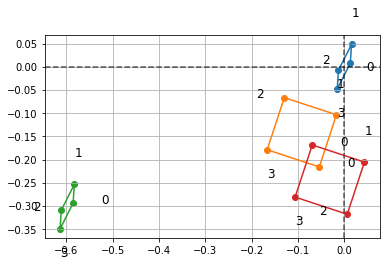

In [19]:
# Select the permutation projection that converges
z_plot(T(n)**6 * (M**1) * L * P)
plt.show()
for i in range(n):
    z_plot(T(n)**6 * (M**i) * L * P)

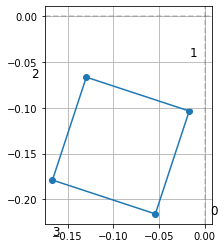

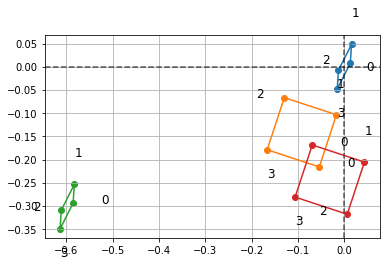

In [20]:
# Select the permutation projection that converges
# note how the project of the centred polygon is the same
z_plot(T(n)**6 * (M**1) * L * Q)
plt.show()
for i in range(n):
    z_plot(T(n)**6 * (M**i) * L * Q)

##### Things to consider:

Random walk...

Graph Laplacians

$Ax=\lambda x$

$L=\Bbb{1}-W$ Laplacian Matrix

$0=\lambda_1\leq \lambda_2 \leq \cdots \leq \lambda_n $ eigenvalues of Laplacian (think about this as energy)

### Closing Thoughts

In [21]:
B, B.shape

⎛⎡1   1   1   1⎤        ⎞
⎜⎢             ⎥        ⎟
⎜⎢-ⅈ  -1  ⅈ   1⎥        ⎟
⎜⎢             ⎥, (4, 4)⎟
⎜⎢-1  1   -1  1⎥        ⎟
⎜⎢             ⎥        ⎟
⎝⎣ⅈ   -1  -ⅈ  1⎦        ⎠

In [22]:
P_, D_ = S(n).diagonalize()
S(n), P_, D_ #, sym.simplify(P*D*P.inv())

⎛⎡1   ⅈ                     ⎤                ⎡1   ⅈ                     ⎤⎞
⎜⎢─ - ─    0      0      0  ⎥                ⎢─ - ─    0      0      0  ⎥⎟
⎜⎢2   2                     ⎥                ⎢2   2                     ⎥⎟
⎜⎢                          ⎥                ⎢                          ⎥⎟
⎜⎢       1   ⅈ              ⎥  ⎡1  0  0  0⎤  ⎢       1   ⅈ              ⎥⎟
⎜⎢  0    ─ - ─    0      0  ⎥  ⎢          ⎥  ⎢  0    ─ - ─    0      0  ⎥⎟
⎜⎢       2   2              ⎥  ⎢0  1  0  0⎥  ⎢       2   2              ⎥⎟
⎜⎢                          ⎥, ⎢          ⎥, ⎢                          ⎥⎟
⎜⎢              1   ⅈ       ⎥  ⎢0  0  1  0⎥  ⎢              1   ⅈ       ⎥⎟
⎜⎢  0      0    ─ - ─    0  ⎥  ⎢          ⎥  ⎢  0      0    ─ - ─    0  ⎥⎟
⎜⎢              2   2       ⎥  ⎣0  0  0  1⎦  ⎢              2   2       ⎥⎟
⎜⎢                          ⎥                ⎢                          ⎥⎟
⎜⎢                     1   ⅈ⎥                ⎢                     1   ⅈ⎥⎟
⎜⎢  0      0      0    ─ 

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

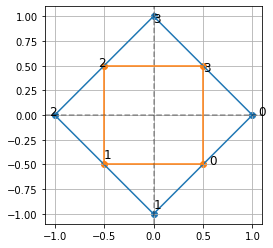

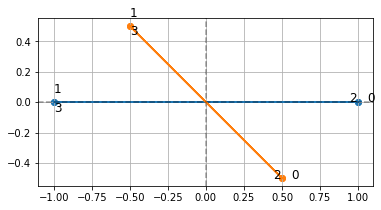

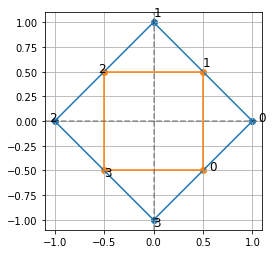

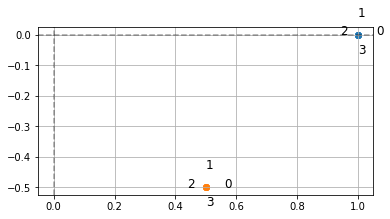

In [23]:
#z_plot(V*(1/2-sym.I/2))
#z_plot(V*S(n).eigenvects()[0][0])
#display([S(n), B, S(n).eigenvects()])

display(Latex(f'S(n).eigenvec()$={sym.latex(S(n).eigenvects())}$'))
display(Latex(f'$S(n)\\circ B={sym.latex(S(n))}{sym.latex(B)}={sym.latex(S(n)*B)}$'))

for i in range(B.shape[1]):
    z_plot(B.col(i))
    z_plot((S(n)*B).col(i))
    plt.show()
    display()

# Add quotent space